In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

for layer in model.layers:
    layer.trainable = False

def extract_features(img_array):
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array)
    return features.flatten()

dataset, info = tfds.load("tf_flowers", split="train", as_supervised=True, with_info=True)

num_images = 10
image_embeddings = []
image_paths = []

for i, (img, label) in enumerate(dataset.take(num_images)):
    img = tf.image.resize(img, (224, 224))
    img_array = np.array(img)
    embedding = extract_features(img_array)

    image_embeddings.append(embedding)
    image_paths.append((img, label))

image_embeddings = np.array(image_embeddings)

def recommend(image_path, top_n=3):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    query_embedding = extract_features(img_array)
    similarities = cosine_similarity([query_embedding], image_embeddings)[0]

    top_indices = np.argsort(similarities)[::-1][:top_n]
    recommended_images = [image_paths[i][0] for i in top_indices]

    return recommended_images

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


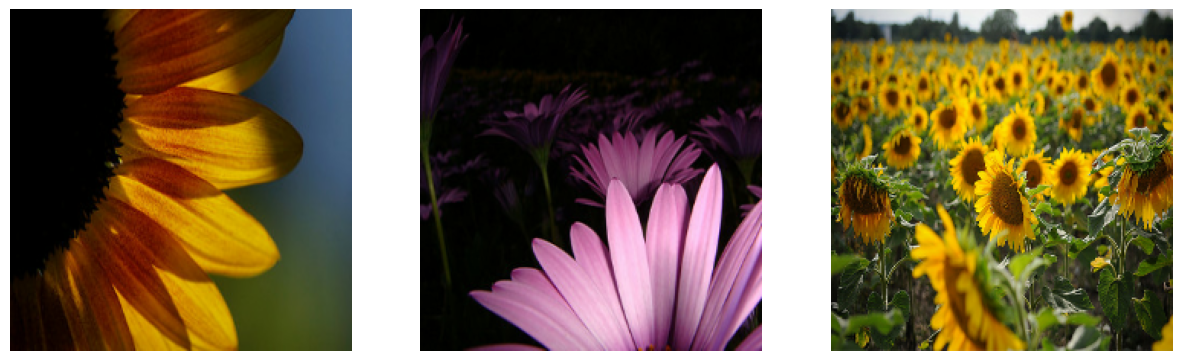

In [3]:

query_image = "/content/girassol.jpg"  # certifique-se de que a imagem esteja no colab
result = recommend(query_image)

#fig, axes = plt.subplots(1, len(result), figsize=(15, 5))

fig, axes = plt.subplots(1, len(result), figsize=(15, 5))

for ax, img in zip(axes, result):
    img_array = np.array(img)
    img_array = img_array / 255.0 if img_array.max() > 1 else img_array
    ax.imshow(img_array)
    ax.axis('off')

plt.show()
